In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from inversion import BBCH

In [4]:
# 2) Crop GDD thresholds per crop (cumulative soil GDD → BBCH)
crop_gdd_thresh = {
    133: [ # 'Barley'
        (90, 10), (240, 21), (380, 30),
        (580, 50), (680, 60), (880, 80),
        (980, 90),
    ],
    136: [ # 'Oats'
        (100, 10),  (250, 21),  (400, 30),
        (600, 50),  (700, 60),  (900, 80),
        (1000, 90),
    ],
    146: [ # 'Spring Wheat'
        (100, 10),  (250, 21),  (400, 30),
        (600, 50),  (700, 60),  (900, 80),
        (1000, 90),
    ],
    147: [ # 'Corn'
        (50, 10),   (200, 30),  (550, 60),
        (1000, 70), (1250, 80), (1650, 90),
    ],
    153: [ # 'Canola'
        (80, 10),  (260, 30),  (450, 50),
        (600, 60), (750, 65),  (950, 80),
        (1050, 89),
    ],
    157: [ # 'Sunflower'
        (80, 10),  (260, 30),  (450, 50),
        (600, 60), (750, 65),  (950, 80),
        (1050, 89),
    ],
    158: [ # 'Soybeans'
        (60, 10),   (220, 30), (450, 50),
        (600, 60),  (800, 70), (1000, 80),
        (1150, 90),
    ],
    167: [ # 'Beans'
        (60, 10),   (220, 30), (450, 50),
        (600, 60),  (800, 70), (1000, 80),
        (1150, 90),
    ],
}

In [8]:
# base temperature for each land cover type (lc)
lc_base_temp = {
    133: 5,
    136: 5,
    146: 5,
    147: 10,
    153: 5,
    157: 8,
    158: 10,
    167: 10
    # Add other lc values and corresponding BASE_TEMP values
}

In [ ]:
risma_dir = '../data/RISMA_CSV_SSM_SST_AirT_2015_2023'
s1_dir = '../data/GEE_Exports_S1_RISMA_Buffer15m_refinedLee_reduce_regions'

pheno = BBCH(risma_dir=risma_dir, s1_dir=s1_dir, crop_gdd_thresholds=crop_gdd_thresh)


In [ ]:
df = pheno.run(lc_base_temp=lc_base_temp)

In [10]:

print(df.shape)
df.head()

(4542, 29)


,date,station,depth,op,mean_sst,mean_airt,SSM,SST,year,doy,...,VH,VV,angle,lc,BASE_TEMP,cum_GDD_air,cum_GDD_soil,cum_GDD,BBCH,cum_SSM
0,2015-04-25,MB1,0 to 5 cm,0,10.166667,7.8365,0.131444,14.981481,2015,115,...,-20.0,-13.0,40.0,146.0,5,2.8365,5.166667,4.001583,0.0,0.131444
2,2015-04-25,MB11,0 to 5 cm,0,8.616667,8.3805,0.273259,12.581481,2015,115,...,-22.0,-14.0,42.0,158.0,10,2.8365,5.166667,4.001583,0.0,0.404704
3,2015-04-25,MB12,0 to 5 cm,0,5.350000,8.0125,0.311259,14.271247,2015,115,...,-22.0,-12.0,42.0,146.0,5,5.8490,5.516667,5.682833,0.0,0.715963
4,2015-04-25,MB2,0 to 5 cm,0,13.270938,8.3070,0.340557,15.961012,2015,115,...,-18.0,-9.0,40.0,146.0,5,9.1560,13.787605,11.471802,0.0,1.056520
5,2015-04-25,MB3,0 to 5 cm,0,8.716667,9.0030,0.271333,12.774074,2015,115,...,-22.0,-13.0,40.0,158.0,10,9.1560,13.787605,11.471802,0.0,1.327854


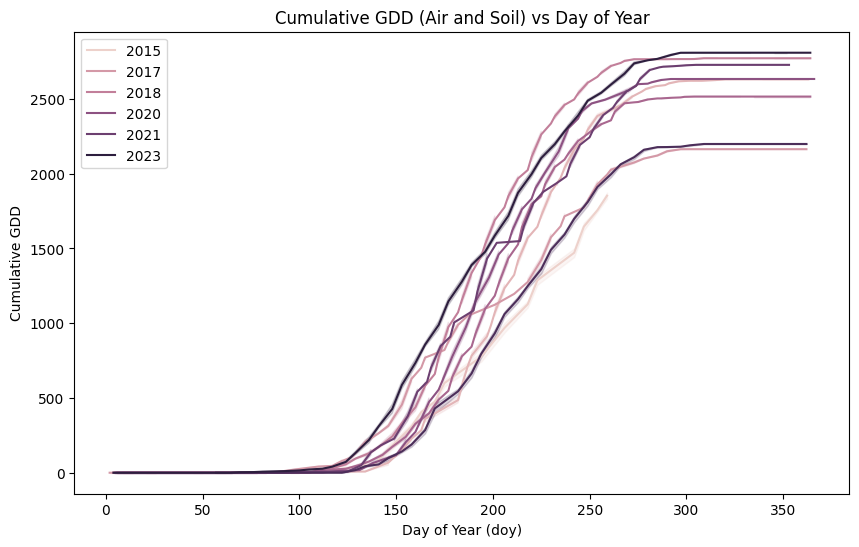

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='doy', y='cum_GDD', data=df, hue='year')
plt.xlabel('Day of Year (doy)')
plt.ylabel('Cumulative GDD')
plt.title('Cumulative GDD (Air and Soil) vs Day of Year')
plt.legend()
plt.show()

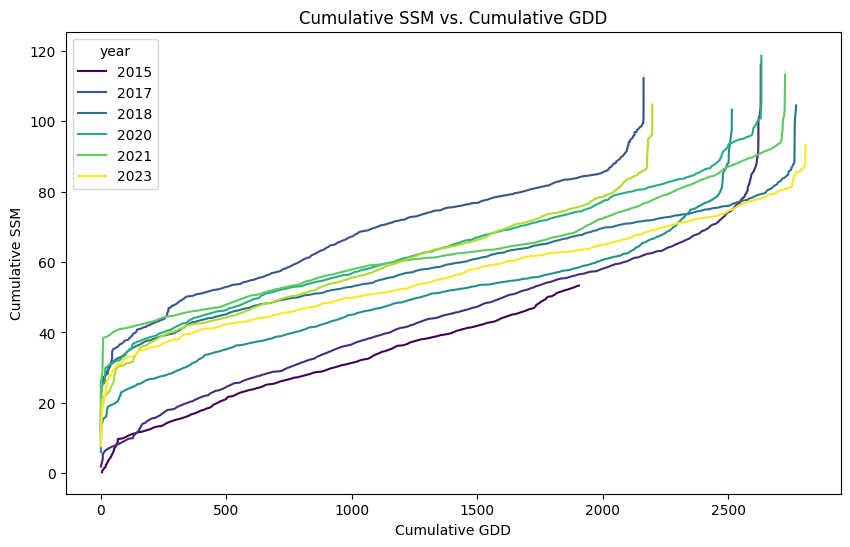

In [12]:
# Create the line plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(x='cum_GDD', y='cum_SSM', hue='year', data=df, palette='viridis')  # Use 'year' for color
plt.xlabel('Cumulative GDD')
plt.ylabel('Cumulative SSM')
plt.title('Cumulative SSM vs. Cumulative GDD')
plt.show()

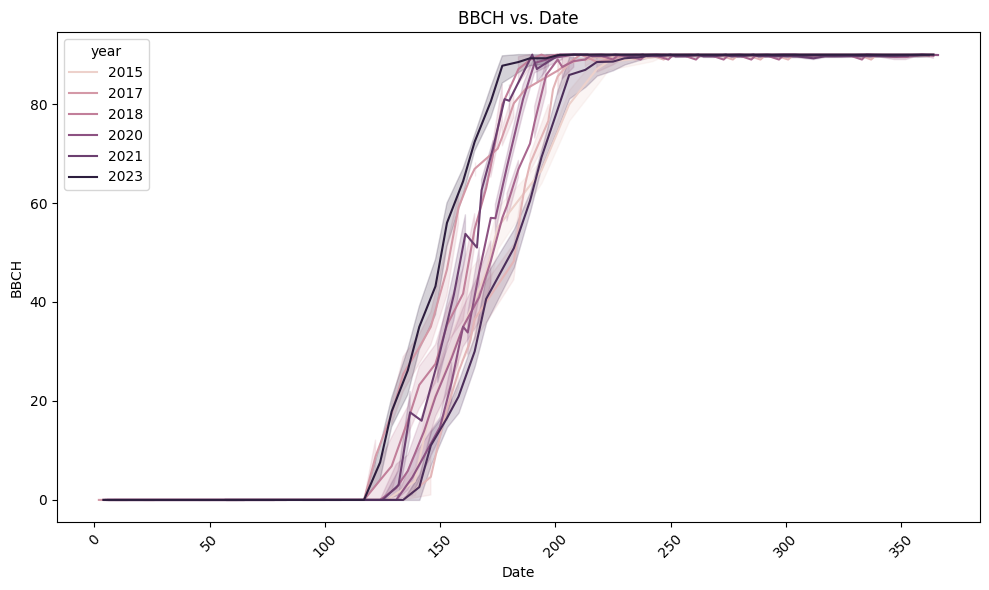

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='doy', y='BBCH', data=df, hue='year')
plt.xlabel('Date')
plt.ylabel('BBCH')
plt.title('BBCH vs. Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()